# Importing Libraries

In [44]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

from missingno import nullity_filter, nullity_sort

# Visualization 
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib as mpl
from matplotlib import gridspec
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from scipy.cluster import hierarchy

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [45]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# Data Inspection
![data](https://i.imgur.com/AC9Bq63.png)

In [46]:
train.shape

(891, 12)

In [47]:
test.shape

(418, 11)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

## Data Formats

In [51]:
train['Sex'] = train['Sex'].map({'male':1, 'female': 0})

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Removing Missing Values

In [53]:
#Inspecting missing values.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

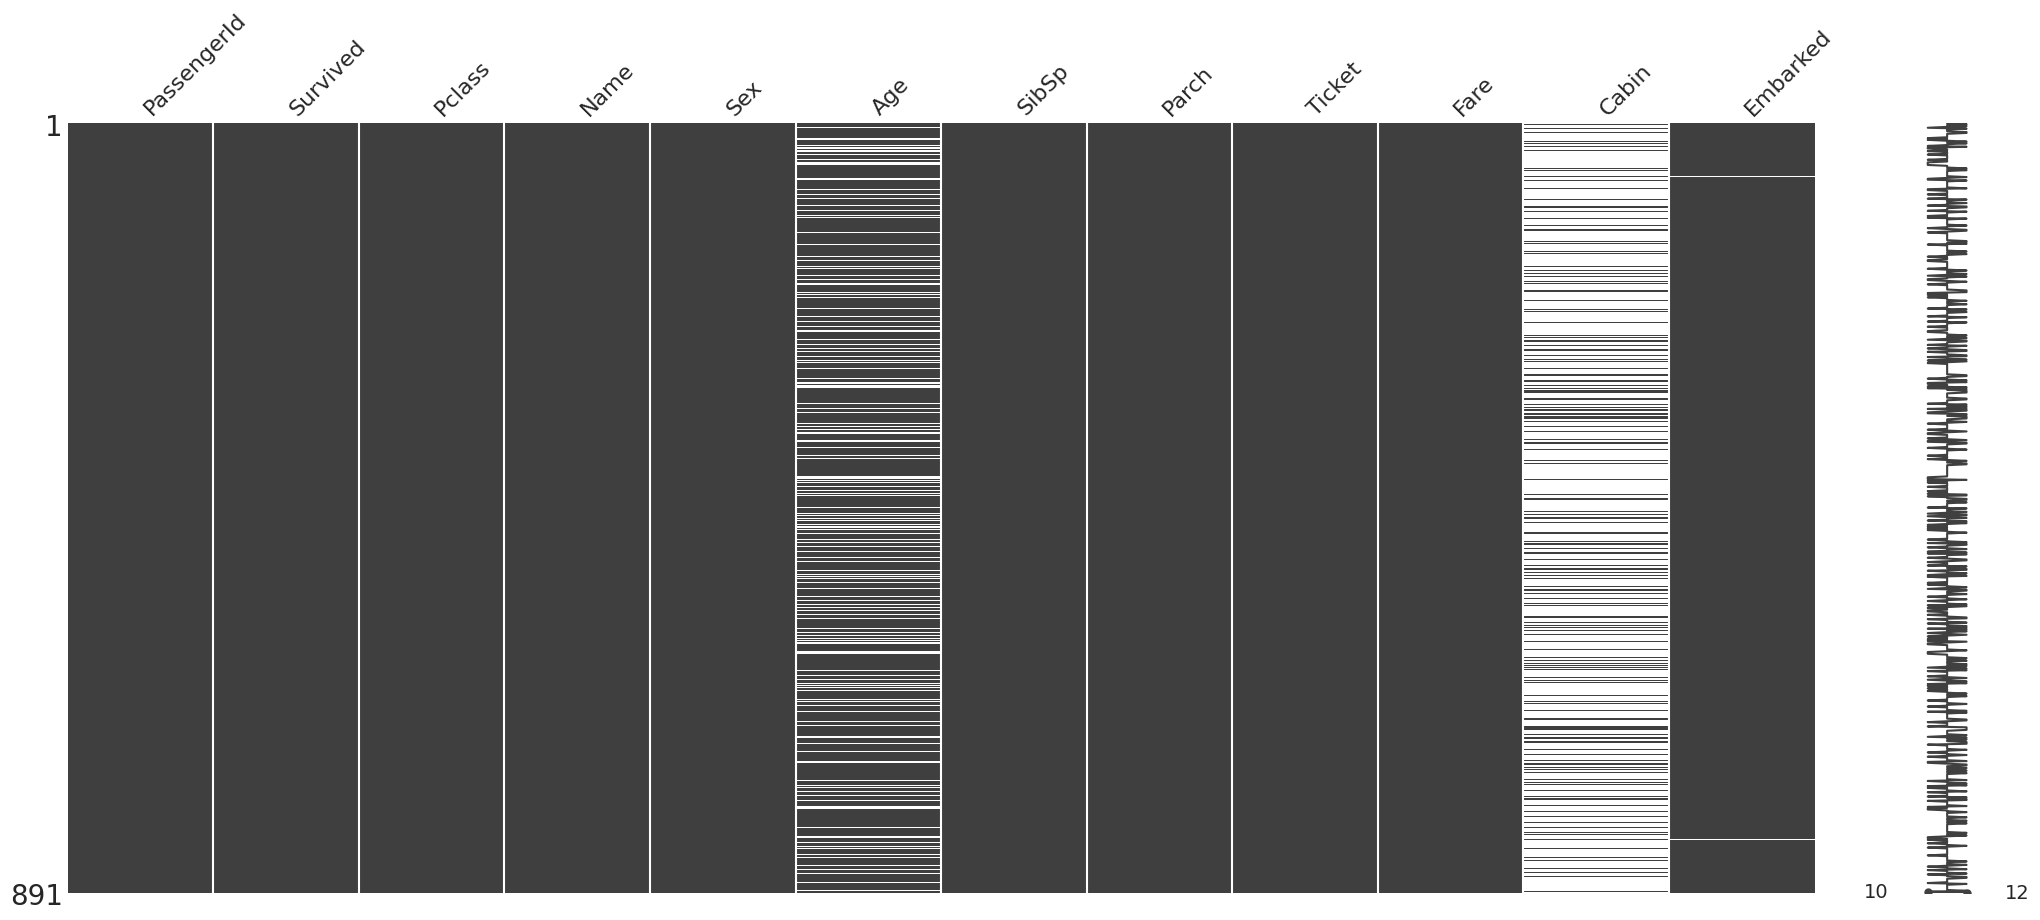

In [54]:
msno.matrix(train)

In [55]:
# show the missing values in dataset with ratio

def missing_values_table(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_table(train)

,n_miss,ratio
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [56]:
train = train.drop(columns = ["Cabin"])
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [57]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

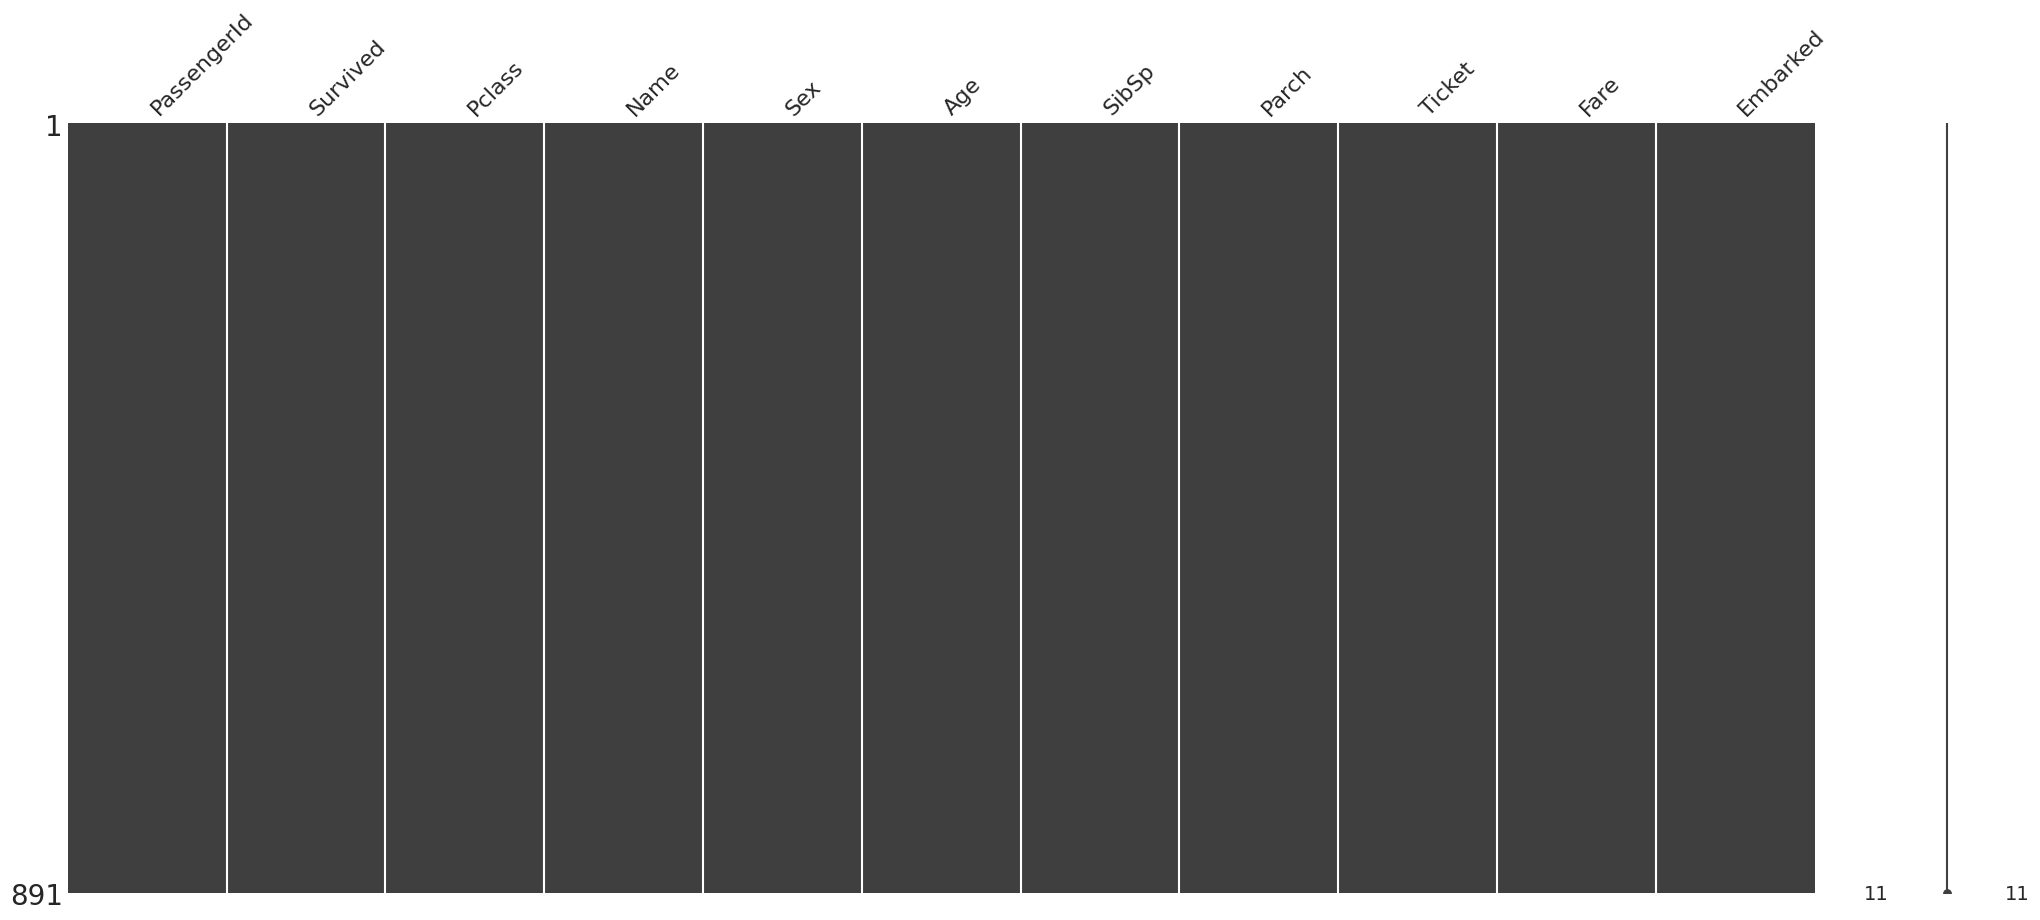

In [71]:
msno.matrix(train)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [59]:
train.duplicated().sum()

0

## Data Binning

In [60]:
train["Age"] = pd.cut(train["Age"], bins = 5)
train["Fare"] = pd.cut(train["Fare"], bins = 5)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,"(16.336, 32.252]",1,0,A/5 21171,"(-0.512, 102.466]",S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,"(32.252, 48.168]",1,0,PC 17599,"(-0.512, 102.466]",C
2,3,1,3,"Heikkinen, Miss. Laina",0,"(16.336, 32.252]",0,0,STON/O2. 3101282,"(-0.512, 102.466]",S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,"(32.252, 48.168]",1,0,113803,"(-0.512, 102.466]",S
4,5,0,3,"Allen, Mr. William Henry",1,"(32.252, 48.168]",0,0,373450,"(-0.512, 102.466]",S


In [67]:
train["Age"].value_counts()

Age
(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64

In [68]:
train["Fare"].value_counts()

Fare
(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: count, dtype: int64

In [69]:
train_clean = train.copy()
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,"(16.336, 32.252]",1,0,A/5 21171,"(-0.512, 102.466]",S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,"(32.252, 48.168]",1,0,PC 17599,"(-0.512, 102.466]",C
2,3,1,3,"Heikkinen, Miss. Laina",0,"(16.336, 32.252]",0,0,STON/O2. 3101282,"(-0.512, 102.466]",S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,"(32.252, 48.168]",1,0,113803,"(-0.512, 102.466]",S
4,5,0,3,"Allen, Mr. William Henry",1,"(32.252, 48.168]",0,0,373450,"(-0.512, 102.466]",S


In [70]:
train_clean_submission = train_clean.to_csv("train_clean_submission.csv", index=False)